In [49]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

Calling the dataset and starting the data exploration, analyzing how it should be manipulated.

In [20]:
data = pd.read_csv('best-selling-manga.csv')

Previewing the dataset

In [21]:
data.head(15)

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s)
0,One Piece,Eiichiro Oda,Shueisha,Shōnen,104,1997–present,516.6,4.97
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968–present,300.0,1.45
2,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,102,1994–present,270.0,2.65
3,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,1984–1995,260.0,6.19
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,250.0,4.71
5,Naruto,Masashi Kishimoto,Shueisha,Shōnen,72,1999–2014,250.0,3.47
6,Slam Dunk,Takehiko Inoue,Shueisha,Shōnen,31,1990–1996,170.0,5.48
7,KochiKame: Tokyo Beat Cops,Osamu Akimoto,Shueisha,Shōnen,201,1976–2016,156.5,0.78
8,Demon Slayer: Kimetsu no Yaiba,Koyoharu Gotouge,Shueisha,Shōnen,23,2016–2020,150.0,6.52
9,Oishinbo,"Tetsu Kariya, Akira Hanasaki",Shogakukan,Seinen,111,1983–2014 (on hiatus),135.0,1.22


Data description.

In [22]:
data.describe()

,No. of collected volumes,Approximate sales in million(s),Average sales per volume in million(s)
count,187.000000,187.000000,187.000000
mean,46.048128,50.764332,1.377380
std,34.678288,57.178028,1.240013
min,5.000000,20.000000,0.190000
25%,23.500000,24.500000,0.670000
50%,34.000000,31.000000,1.030000
75%,56.500000,50.500000,1.650000
max,207.000000,516.600000,10.000000


Approach to the data context:

* One Piece, the most popular manga in Japan's history, consequently, there are no outliers in its sales figures.

* There are two main target audiences that seem to be the most popular: seinen and shonen.

   1. Shonen: The term "shonen" refers to manga and anime primarily targeted at a young male audience. These stories are often filled with action, adventure, and exciting battles. The protagonists are typically brave and energetic young individuals who face challenges and overcome obstacles to achieve their goals. Popular examples of shonen include "Dragon Ball," "One Piece," "Naruto," and "My Hero Academia."

   2. Seinen: On the other hand, "seinen" refers to manga and anime targeted at an adult male audience. These stories tend to be more mature and explore complex and profound themes. They often address aspects of everyday life, psychology, politics, romance, or violence in a more realistic and detailed manner. While they are intended for an adult audience, it does not mean they cannot be enjoyed by people of other ages. Popular examples of seinen include "Attack on Titan," "Berserk," "Death Note," and "Tokyo Ghoul."

This context provides insight into the popularity of "One Piece" and the two primary audience segments it appeals to.

The dataset includes information about 187 mangas. Additionally, it is necessary to correct the date format. We are going to add two new columns: one for the release year and another one for the last publication year. Also, we will replace "present" with the current year. Furthermore, I believe it would be useful to add another column to determine if the manga is still ongoing or not.

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Manga series                            187 non-null    object 
 1   Author(s)                               187 non-null    object 
 2   Publisher                               187 non-null    object 
 3   Demographic                             187 non-null    object 
 4   No. of collected volumes                187 non-null    int64  
 5   Serialized                              187 non-null    object 
 6   Approximate sales in million(s)         187 non-null    float64
 7   Average sales per volume in million(s)  187 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 11.8+ KB


Before continuing, I will clean the data and then create the additional columns that I consider necessary.

In [24]:
for columna in data.columns:
    valores_nulos = data[columna].isnull().sum()
    print('{}-{}'.format(columna,valores_nulos))

Manga series-0
Author(s)-0
Publisher-0
Demographic-0
No. of collected volumes-0
Serialized-0
Approximate sales in million(s)-0
Average sales per volume in million(s)-0


Next, I will create the new columns.

In [25]:
datos = data
def extract_years(Serialized):
    
    if 'present' in Serialized:
        match = re.search(r'(\d{4})–present', Serialized)  
        start_year = match.group(1)
        return start_year,"2023","present"
    
    if 'on hiatus' in Serialized:
        match = re.search(r'(\d{4})–(\d{4})', Serialized)
        start_year = match.group(1)
        end_year = match.group(2)
        return start_year, end_year, 'on hiatus'
    
    else:
        match = re.search(r'(\d{4})–(\d{4})', Serialized)
        start_year = match.group(1)
        end_year = match.group(2)
        return start_year, end_year, 'End'
        

datos[['Inicio', 'Fin', 'Estado']] = datos['Serialized'].apply(extract_years).apply(pd.Series)



In [26]:
data=datos

In [27]:
data

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s),Inicio,Fin,Estado
0,One Piece,Eiichiro Oda,Shueisha,Shōnen,104,1997–present,516.6,4.97,1997,2023,present
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968–present,300.0,1.45,1968,2023,present
2,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,102,1994–present,270.0,2.65,1994,2023,present
3,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,1984–1995,260.0,6.19,1984,1995,End
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,250.0,4.71,1969,1996,End
...,...,...,...,...,...,...,...,...,...,...,...
182,Sukeban Deka,Shinji Wada,Hakusensha,Shōjo,22,1976–1982,20.0,0.90,1976,1982,End
183,Swan,Kyoko Ariyoshi,Shueisha,Shōjo,21,1976–1981,20.0,0.95,1976,1981,End
184,The Tale of Genji,Waki Yamato,Kodansha,Shōjo,13,1980–1993,20.0,1.53,1980,1993,End
185,Tokyo Daigaku Monogatari,Tatsuya Egawa,Shogakukan,Seinen,34,1992–2001,20.0,0.58,1992,2001,End


The "Serialized" column is not entirely standardized, and there is one inaccurate data point. However, it can be manually corrected using its index, and we can try to fix it. Nevertheless, we do not believe that the data is relevant.

The objective now is to represent graphically the values provided by the data. Therefore, I will characterize the columns "author," "publisher," "demographic," and "title" based on their average sales per volume.

In [28]:
#Demografia
demografia=data.Demographic.value_counts()
demografia

Demographic
Shōnen                101
Seinen                 50
Shōjo                  21
Shōnen/Seinen           6
Children                4
Josei                   2
—                       1
Shōjo/Josei             1
Shōnen/shōjo/Josei      1
Name: count, dtype: int64

In [29]:
#Editorial
editorial=data.Publisher.value_counts()
editorial

Publisher
Shueisha                                     65
Kodansha                                     50
Shogakukan                                   32
Akita Shoten                                 11
Hakusensha                                    7
Nihon Bungeisha                               3
Futabasha                                     2
Shōnen Gahōsha                                2
Square Enix                                   2
Kadokawa Shoten                               2
Ushio Shuppansha                              1
Enix (2001–2003), Square Enix (2003–2010)     1
Kobunsha                                      1
Jitsugyo no Nihon Sha                         1
Shueisha/Kodansha                             1
Shinchosha, Tokuma Shoten                     1
Square Enix, Ichijinsha                       1
Gakken                                        1
Enix                                          1
Ushio Shuppan                                 1
Shueisha/Shogakukan/Leed      

In [30]:
#Autor
data["Author(s)"].value_counts()
#Existen 164 autores diferentes, quizas es irrelevante intentar analizarlos

Author(s)
Rumiko Takahashi        4
Tsukasa Hojo            3
Naoki Urasawa           3
Mitsuru Adachi          3
Osamu Tezuka            3
                       ..
Tochi Ueyama            1
Chieko Hosokawa         1
Hiroyuki Nishimori      1
Fuse, Taiki Kawakami    1
Yoshihiro Takahashi     1
Name: count, Length: 164, dtype: int64

**Demografia**


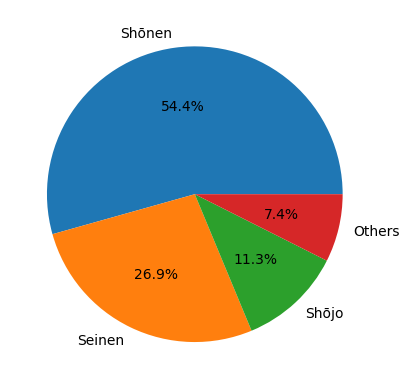

In [31]:
total = demografia.sum()
porcentajes = demografia / total * 100

umbral = 4 

categorias_otros = porcentajes[porcentajes < umbral].index

demografia_modificado = demografia.copy()
demografia_modificado[categorias_otros] = demografia[~demografia.index.isin(categorias_otros)].sum()
demografia_modificado = demografia_modificado[~demografia_modificado.index.isin(categorias_otros)]

etiquetas = list(demografia_modificado.index)
etiquetas.append("Others")

porcentajes_modificados = list(demografia_modificado / demografia_modificado.sum() * 100)
porcentajes_modificados.append(porcentajes[categorias_otros].sum())

fig, ax = plt.subplots()
ax.pie(porcentajes_modificados, labels=etiquetas, autopct='%1.1f%%')
plt.show()

**Publisher**

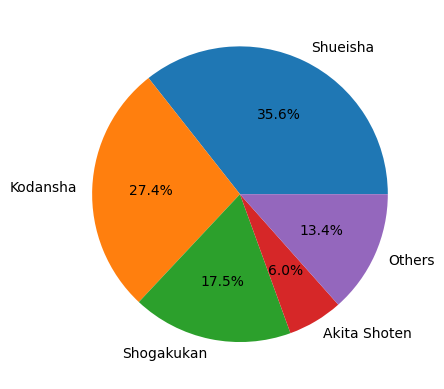

In [32]:
total = editorial.sum()
porcentajes = editorial / total * 100

umbral = 4 

categorias_otros = porcentajes[porcentajes < umbral].index

editorial_modificado = editorial.copy()
editorial_modificado[categorias_otros] = editorial[~editorial.index.isin(categorias_otros)].sum()
editorial_modificado = editorial_modificado[~editorial_modificado.index.isin(categorias_otros)]

etiquetas = list(editorial_modificado.index)
etiquetas.append("Others")

porcentajes_modificados = list(editorial_modificado / editorial_modificado.sum() * 100)
porcentajes_modificados.append(porcentajes[categorias_otros].sum())

fig, ax = plt.subplots()
ax.pie(porcentajes_modificados, labels=etiquetas, autopct='%1.1f%%')
plt.show()

Number of volumes sold by demographic throughout the years.

**Machine Learning (ML)**

We are going to predict the value of "Approximate sales in million(s)."

In [33]:
X = data.drop(['Manga series','Author(s)','Publisher','Demographic','Serialized'],axis=1)
mapeo = {
    'present': 1,
    'on hiatus': 2,
    'End': 3
}

X['Estado'] = X['Estado'].map(mapeo)
y = data['Approximate sales in million(s)']   

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=0)
model = RandomForestRegressor(n_estimators=100, random_state=0, min_samples_split=2)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [35]:
y_train_predict = model.predict(X_train)
train_mae = mean_absolute_error(y_train_predict, y_train)
print("mae_train", train_mae)

y_test_predict = model.predict(X_test)
test_mae = mean_absolute_error(y_test_predict, y_test)
print("mae_test", test_mae)

r2 = r2_score(y_train_predict, y_train)
print ("r2" ,r2*100 ,"%") 

mae_train 2.0383935483871016
mae_test 2.860747872340421
r2 96.5106130641618 %


In [40]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=55)
dt.fit(X_train,y_train)
ypre=dt.predict(X_test)
acc=r2_score(y_test,ypre)
acc

0.32169827663571116

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Assuming you have already loaded and preprocessed your data into xtrain, ytrain, xtest, ytest

lr = LinearRegression()
lr.fit(X_train, y_train)
ypred = lr.predict(X_test)

# Calculate R-squared (R2) score
acc = r2_score(y_test, ypred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, ypred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, ypred)

print("R2 Score:", acc)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R2 Score: 1.0
Mean Squared Error: 9.773818772942545e-28
Mean Absolute Error: 2.1127307940951915e-14


In [44]:
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf_grid=GridSearchCV(estimator = rf,param_grid =param_grid,verbose=2,n_jobs=-1)
rf_grid.fit(X_train,y_train)
yp=rf_grid.predict(X_test)
acc=r2_score(y_test,yp)
acc

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\Guduri Prasanna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
810 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
510 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Guduri Prasanna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Guduri Prasanna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Guduri Prasanna\AppData\Local\Programs\Python

0.9308496625599095

In [46]:
yp=rf_grid.predict(X_test)

In [47]:
acc=r2_score(y_test,yp)
acc

0.9308496625599095

In [50]:
from joblib import load,dump

In [51]:
dump(rf,'RFS.joblib')

['RFS.joblib']

In [52]:
load('RFS.joblib')

RandomForestRegressor()